In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

In [2]:
h1b_df = pd.read_pickle('dataset/h1b_0818.pkl')

# Trends in employment

We can figure out that generally the employment had a growing trend from 2008 to 2018, while it declined bewteen between   08 and 10 & 16 and 17, which may be due to financial crisis.

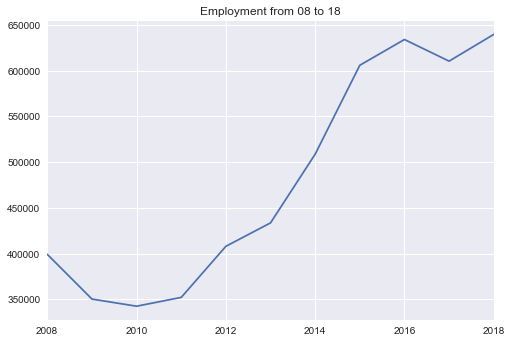

In [3]:
plt.style.use('seaborn')
employ_trend = h1b_df['year'].value_counts().sort_index()
employ_trend.plot(title='Employment from 08 to 18', label='employment')

# Trends in salary

first exclude outliers in the data:

In [4]:
h1b_df.loc[h1b_df['annual_wage']>1e7,'annual_wage'] = np.nan

The average salary level is increasing between 2008 and 2018.

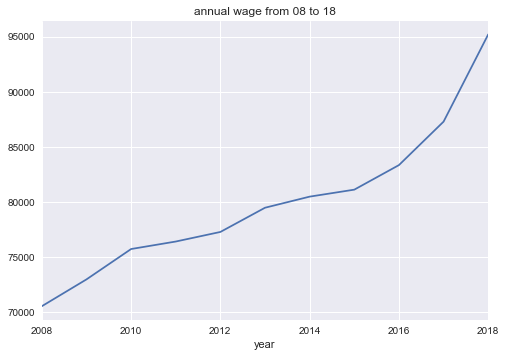

In [5]:
wage_trend=h1b_df[['annual_wage','year']].groupby('year').apply(np.mean)['annual_wage']
wage_trend.plot(title='annual wage from 08 to 18', label='annual wage')

# Most popular positions, industries and locations

## Positions

### all time

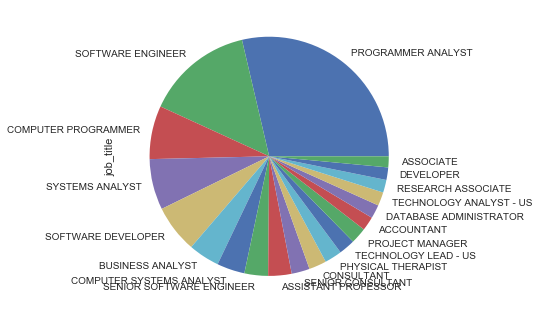

In [6]:
h1b_df['job_title'].value_counts().head(20).plot(kind='pie')

From above we can conclude that `CS-related` positions are really popular in H1B employment. Other popular positions include `Business Analyst`, `Assistant Professor` and `Consultant`.

### 08-09

Now take a look at data in the period of 08-09:

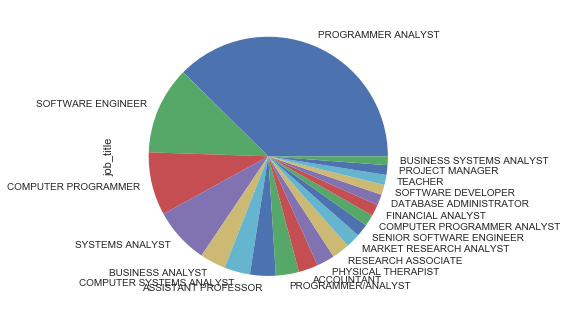

In [7]:
h1b_0809 = h1b_df[h1b_df['year'].isin([2008,2009])]

h1b_0809['job_title'].value_counts().head(20).plot(kind='pie')

Not too much difference from the patterns in recent data.

## Industries

To get the corresponding industry for each application, we need to merge the naic df into h1b df.

Since the naic codes in the h1b df are in 2-6 digit format, so we load `2-6 digits_2017_Codes.csv` for merging.

In [8]:
def code2int(x):
    try:
        return int(x)
    except:
        return np.nan

In [9]:
naic_df = pd.read_csv('dataset/2-6 digit_2017_Codes.csv',index_col=0)

naic_df.columns = ['naic_code', 'naic_title']

naic_df['naic_code'] = naic_df['naic_code'].apply(code2int)

In [10]:
indus_df = pd.merge(h1b_df['naic_code'].apply(code2int),naic_df.dropna(), how='left',left_on='naic_code',right_on='naic_code')

Finally we can analyze the popularity in industries:

### all time

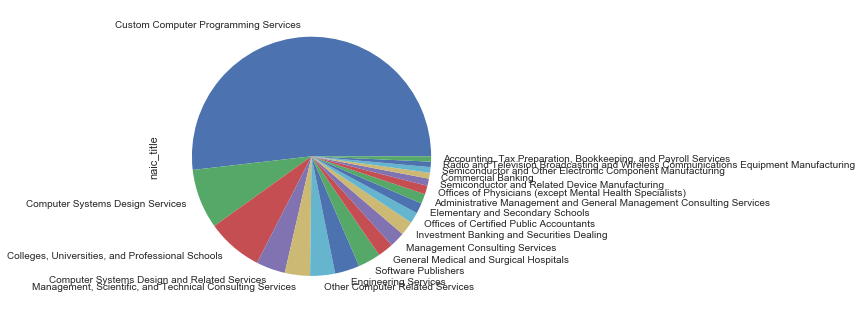

In [11]:
indus_df['naic_title'].value_counts().head(20).plot(kind='pie')

It's obvious that the industry of `Computer Science` (including `Programming`, `Systems Design`, `Software` etc.), is really hot. Other popular industries include `Education`, `Consulting`, `IBD`.

### 08-09

Next, data in 08-09:

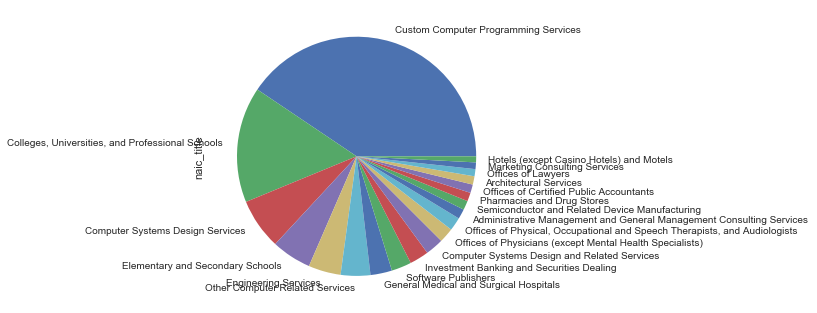

In [12]:
pd.merge(h1b_0809['naic_code'].apply(code2int),naic_df.dropna(), how='left',
         left_on='naic_code',right_on='naic_code')['naic_title'].value_counts().head(20).plot(kind='pie')

We can see that the `Education` industry declined a lot since in the recent 10 years.

## Locations

### all time

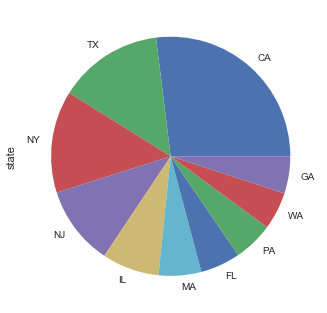

In [13]:
h1b_df['state'].value_counts().head(10).plot(kind='pie')

### 08-09

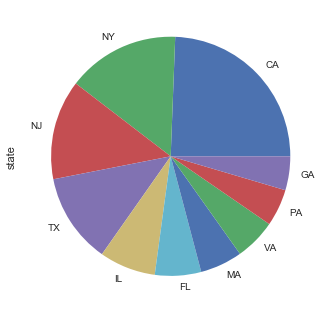

In [14]:
h1b_0809['state'].value_counts().head(10).plot(kind='pie')

From above we can conclude that `California`, `Texas`, and `Great New York Area` are the most popular locations.

Moreover, the popularity of `Texas` has surpassed that of `Great New York Area` in recent years.

# Companies

First we do some simple parsing on companies' names, i.e. delete the '.' at the end of the name:

In [15]:
h1b_df['employer'] = h1b_df['employer'].apply(lambda x: x[:-1] if str(x)[-1]=='.' else x)
h1b_0809['employer'] = h1b_0809['employer'].apply(lambda x: x[:-1] if str(x)[-1]=='.' else x)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


To figure out the trends in the employment of different companies, we compare the data in 08-09 and data in 17-18.

In [16]:
h1b_1718 = h1b_df[h1b_df['year'].isin([2017,2018])]

In [17]:
comps_0809 = h1b_0809['employer'].value_counts().rename('employment 08-09')
comps_1718 = h1b_1718['employer'].value_counts().rename('employment 17-18')
comps_trend = pd.merge(comps_0809, comps_1718, how='inner',
                       left_index=True, right_index=True)

We select those companies whose employment is larger than 100 in 08-09 and sort them by changing rates of employment.

Following is the companies which cut down their employment most:

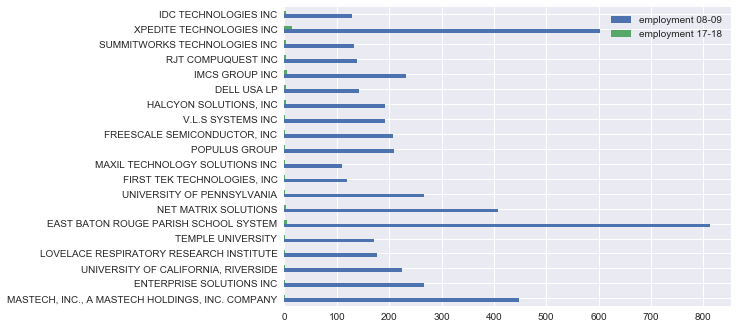

In [18]:
comps_trend = comps_trend[comps_trend.iloc[:,0]>100]
comps_trend['changing rate'] = comps_trend.pct_change(axis=1).iloc[:,1]
comps_trend.sort_values(by='changing rate').iloc[:,:2].head(20).plot(kind='barh')

We can figure out that some famous companies like `DELL`, `XPEDITE` and some universities like `UPenn`, `Temple University` cut down their H1B employment a lot.

Now take a lot at those companies who increased their hiring in H1B employees:

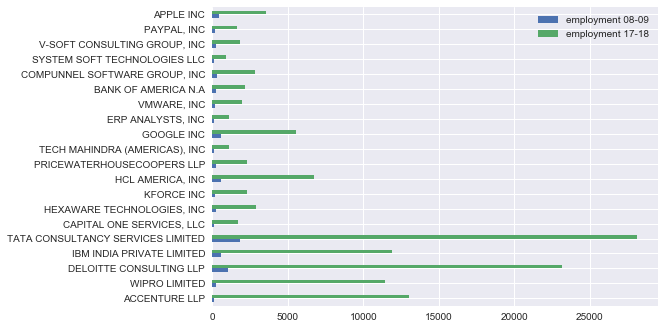

In [19]:
comps_trend.sort_values(by='changing rate',ascending=False).iloc[:,:2].head(20).plot(kind='barh')

Many technology companies like `Google`, `Apple` and `Paypal` increased their H1B employment a lot. Other famous corporations include `Bank of America` and `Deloitte`.

# Job recommandations

According to the above results, I will recommand my classmates to apply for jobs in the IT industry, **Google** and **Apple** are desriable choices. As for locations, I vote for California and Texas.

# Extra credits

In [20]:
h1b_all = pd.read_pickle('dataset/h1b_all.pkl')

In [21]:
h1b_0203 = h1b_all[h1b_all['year'].isin([2003,2003])]
h1b_0607 = h1b_all[h1b_all['year'].isin([2006,2007])]

Take a look at the trend of locations in the 02-03, 06-07, 08-18 periods:

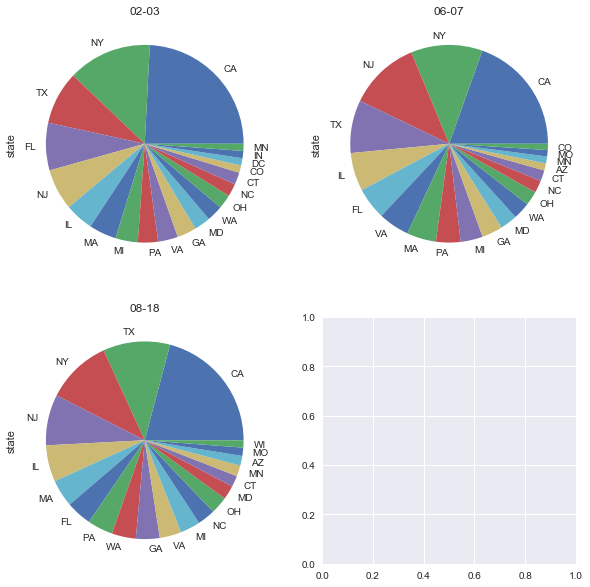

In [22]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.flatten()
h1b_0203['state'].value_counts().head(20).plot(kind='pie',ax=axes[0],title='02-03')
h1b_0607['state'].value_counts().head(20).plot(kind='pie',ax=axes[1],title='06-07')
h1b_df['state'].value_counts().head(20).plot(kind='pie',ax=axes[2],title='08-18')

In the 02-03 period, **Florida** is more popular than other periods;

In the 06-07 period, **New Jersey** is more popular than other periods.